<H2><CENTER> Sentiment Analysis<CENTER><H2>

### Importing necessary packages

In [1]:
import re
import time
import codecs
import numpy as np
import pandas as pd
from cltk.stop.classical_hindi.stops import STOPS_LIST
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [3]:
import spacy
from spacy.lang.te import STOP_WORDS as STOP_WORDS_TE
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI
with codecs.open("Data/telugu_stopwords.txt", encoding='utf-8') as f:
    stop_txt_te = f.read()
with codecs.open("Data/bengalistop.txt", encoding='utf-8') as g:
    stop_txt_be = g.read()
stop_te = stop_txt_te.splitlines()
stop_be = stop_txt_be.splitlines()

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Reading files

In [5]:
with codecs.open("Data/telugu.txt", encoding='utf-8') as f:
    txt1 = f.read()#to read the total file
print(txt1[0:1000])

24ఎస్టీయూ తెలంగాణ24 చరిత్రలో ఈ రోజు/అక్టోబర్ 24 󾔖ఐక్యరాజ్య సమితి పతాకం󾔖 󾔖ఐక్యరాజ్యసమితి దినోత్సవం󾔖 󾭺1577 :...
ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరోకి ఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు.. #ప్రభాస్
ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరో #ప్రభాస్ కిఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు
*_BE A LIGHT INTO YOURSELF_* *మనం మానసిక ప్రశాంతతను ఎలా పొందవచ్చు.* మానసిక ప్రశాంతత ఇది ఎక్కడ...
అమ్మకు ఎంత గౌరవమిస్తున్నారో భార్యకు కూడా అంతే ఇవ్వండి.. ఎందుకంటే ఒకరు *చందమామ* చూపిస్తారు.. మరొకరు *చుక్కలు* చూపిస్తారు..!!
నీ ప్రమేయం లేకుండా నిన్ను ఎవరూ నాశనం చేయలేరు, అది తెలుసుకుంటే.. నీకు ఒకర్ని నిందించే అవసరం ఎప్పుడూ రాదు; శుభోదయం..!!
పరిస్థితులెలా ఉన్నా నీ కర్తవ్యం నీకు గుర్తుంటే.. జరగాల్సిన పనులు జరుగు తుంటాయి; శుభోదయం..!!
నీకు అందని దానికోసం ఆశపడకు, నీకు నచ్చని దానికోసం కష్టపడకు, నీకై కష్టపడేవారిని మరిచిపోకు, నిన్ను ఇష్టపడేవారిని వదులు కోకు. శుభోదయం..!!
దీపావళి శుభాకాంక్షలు. మన పద్దతి ప్రకారమే అయితే దీపాలు ఆర్పకూడదు. అలా ఈసారి దీపావళి నాకు ఓరోజు ముందే వచ్సినట్టే.
krish tweet ....

In [6]:
with codecs.open("Data/bengali_data.txt", encoding='utf-8') as f:
    txt2 = f.read()#to read the total file
print(txt2[0:1000])

আমি জানি এই জীবনটারঙীন!তাইবলেএমনরঙে জীবনটাকে রাঙিয়ে তুলুন না,যাতে করেপরো জীবন এ আপনাররঙের সাথী হয় জাহান্নামে লালআগুন একটু হলেও ভাবুন
আমি নির্বাক #MASH বস হেডস অফ টু ইউ কাপালি দ্যা হিউম্যান যাকে আইসিএল এ আমরা বিস্ফোরক হতে দেখেছি এবং তারই একটা শোডাউন #CHAMP
একটি ডায়গনিস্টিক বা মলত্যাগ: ((;´☋｀;)):ঈশ্বরের ডায়গনিস্টিক বা: ((;´☋｀;)):আমি বিষ্ঠা নির্ণয়েররররররররররーーーーーーーーーー！！！！！！！！
জিনঁ আমি আপনি ভালবাসেন এবং আপনি আমাকে হত্যা প্রেম .. مجرد نصيحه وكل واحد حر بنفسه — . …
#ঠিক_এমন_এভাবে #তুই_থেকে_যা_স্বভাবে #আমি_বুঝেছি_কদিনেই #আর_তুই_ছাড়া_গতি_নেই
যখন থাকো কাছে উষ্ণ প্রেমের আঁচে হয়ে যাই ঘুড়ী এক সাথে উড়ি, যখন যাও দূরে মনটা হয় ভবঘুরে আমি আর এ হৃদয় একসাথে পুড়ি......
আমি চেষ্টা করবো তিন জায়গায় ভালো করার যেহেতু আমি বোলিংও করতে পারি ব্যাটসম্যান আছি ফিল্ডারও আছি মূল কথা হচ্ছে শতভাগ দেয়ার চেষ্টা করবো.
বালিকা,, তুমি লাইটার হয়ে যাও;) আমি,, বিড়িটা একটু ধরাই বিড়ি টানতে মন চাইতাছে
#In_a_relationship এর বাংলা অনুবাদ: আমি জেনেশুনে আগুনে ঝাপ দিলাম! -_--_-
দিনশেষে এইটাই প্রাপ্তি... যে, আমি কে?? তুম

In [7]:
with codecs.open("Data/hindi.txt", encoding='utf-8') as f:
    txt3 = f.read()#to read the total file
print(txt3[0:1000])

कुछ भी हो जाये आज का मैच हारू या जीतू भाई लेकिन पाण्डेय ने साबित कर दिया की हम जनरल वाले गिरते लडखडाते मंजिल तक पहुच ही जाते हैं!liveअपडेट
नसा चडाउने रुप तिम्रो मायाले हेर्दा फेरिन्छ की आशा बढाउने साथ तिम्रो आशैआशले घेरिन्छ की
अब सुबह की वो एक्स्ट्रा दो घण्टे की नींद अरमान बन कर रह गयी है। शायद मेच्योरिटी/ जिम्मेदारी सबसे पहले नींद पर असर डालती है
Abp न्यूज़ वाले तो ऐसे हनीप्रीत के पीछे लगे हुए हैं, जैसे की उनके ex gf वापिस आ गयी हो।
सोचेंगे हमकि क्यूँ दिल को भातेहो बोलेंगे कि क्यूँ इतना दिल को लुभातेहो कहदो आज तुमभी अपने दिल से नही है प्यार फिर इंतजार क्यूँ करतेहो #moon
आज की #FunKiBaat में बहुत ही मज़ा आया (बउआ भाई), सुषमा जी के और हाफिज के बातो का मेल खूब पसंद आया।। लगे रहो और ऐसे ही हँसाते रहो
सारे शहर में उनकी कामयाबी के चर्चे हैं और एक हम हैं उनके इतने अज़ीज़ कि हमको उनकी खबर तक नही #moon
राहुल गांधी, जब सत्ता में नहीं मंदिरों का दौरा कर रहे हैं, जब सत्ता में थे कोर्ट में कहा कि "राम कभी था ही नहीं" गुजरात वालो समझ जाओ!
भारत सरकार की पडोसी देश अफगानिस्तान की मदद करना बहुत ही अच्छ

In [8]:
#telugu
sentiment_te = (pd.read_csv("Data/telugu.csv"))
sentiment_te = sentiment_te["label"].tolist() 

In [9]:
#bengali
sentiment_be = (pd.read_csv("Data/bengali_data.csv"))
sentiment_be = sentiment_be["label"].tolist() 

In [10]:
#hindi
sentiment_hi = (pd.read_csv("Data/hindi.csv"))
sentiment_hi = sentiment_hi["label"].tolist() 

### Conversion - Labels ###

In [11]:
#TELUGU
#postive=2
#neutral=0
#negative=1
for i in range(0,len(sentiment_te)):
    if(sentiment_te[i]==19 or sentiment_te[i]==18 or sentiment_te[i]==17 or sentiment_te[i]==13 or sentiment_te[i]==12 or sentiment_te[i]==11 or sentiment_te[i]==9 or sentiment_te[i]==8   ):
        sentiment_te[i]="ne"
    elif(sentiment_te[i]==15 or sentiment_te[i]==16):
        sentiment_te[i]="neg"
    else:
        sentiment_te[i]="pos"

In [12]:
#BENGALI
#postive=2
#neutral=0
#negative=1
for i in range(0,len(sentiment_be)):
    if(sentiment_be[i]==19 or sentiment_be[i]==18 or sentiment_be[i]==17 or sentiment_be[i]==13 or sentiment_be[i]==12 or sentiment_be[i]==11 or sentiment_be[i]==9 or sentiment_be[i]==8):
        sentiment_be[i]="ne"
    elif(sentiment_be[i]==15 or sentiment_be[i]==16):
        sentiment_be[i]="neg"
    else:
        sentiment_be[i]="pos"

In [13]:
#HINDI
#postive=2
#neutral=0
#negative=1
for i in range(0,len(sentiment_hi)):
    if(sentiment_hi[i]==19 or sentiment_hi[i]==18 or sentiment_hi[i]==17 or sentiment_hi[i]==13 or sentiment_hi[i]==12 or sentiment_hi[i]==11 or sentiment_hi[i]==9 or sentiment_hi[i]==8):
        sentiment_hi[i]="ne"
    elif(sentiment_hi[i]==15 or sentiment_hi[i]==16):
        sentiment_hi[i]="neg"
    else:
        sentiment_hi[i]="pos"

### Cleaning Text

In [14]:
#telugu
def remove_punct_te(text):
    new_words = " "
    for word in text:
        if word not in STOP_WORDS_TE or stop_te:
            w = re.sub(r'[.#-:?!\_|""'',-...A-Za-z0-9]','',word) #remove everything except words and space#how 
            new_words = new_words + w
    return re.sub(r"\s+", " ", new_words, flags=re.UNICODE)

In [15]:
#bengali
def remove_punct_be(text):
    new_words = " "
    for word in text:
        if word not in stop_be:
            w = re.sub(r'[.#-:?!\_|""'',-...A-Za-z0-9]','',word) #remove everything except words and space#how 
            new_words = new_words + w
    return re.sub(r"\s+", " ", new_words, flags=re.UNICODE)

In [16]:
#hindi
def remove_punct_hi(text):
    new_words = " "
    for word in text:
        if word not in STOP_WORDS_HI or STOPS_LIST:
            w = re.sub(r'[.#-:?!\_|""'',-...A-Za-z0-9]','',word) #remove everything except words and space#how 
            new_words = new_words + w
    return re.sub(r"\s+", " ", new_words, flags=re.UNICODE)

In [17]:
#telugu
start = time.time()
text_te = txt1.splitlines()
filtered_sentence_te = []
for i in range(0,len(text_te)):
    filtered_sentence_te.append(remove_punct_te(text_te[i]))
print(filtered_sentence_te[0:10])
end = time.time()
t0 = end-start
print("Time taken to filter the Telugu Data :",t0,"s")

[' ఎస్టీయూ తెలంగాణ చరిత్రలో ఈ రోజుఅక్టోబర్ \U000fe516ఐక్యరాజ్య సమితి పతాకం\U000fe516 \U000fe516ఐక్యరాజ్యసమితి దినోత్సవం\U000fe516 \U000feb7a ', ' ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరోకి ఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు ప్రభాస్', ' ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరో ప్రభాస్ కిఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు', ' మనం మానసిక ప్రశాంతతను ఎలా పొందవచ్చు మానసిక ప్రశాంతత ఇది ఎక్కడ', ' అమ్మకు ఎంత గౌరవమిస్తున్నారో భార్యకు కూడా అంతే ఇవ్వండి ఎందుకంటే ఒకరు చందమామ చూపిస్తారు మరొకరు చుక్కలు చూపిస్తారు', ' నీ ప్రమేయం లేకుండా నిన్ను ఎవరూ నాశనం చేయలేరు అది తెలుసుకుంటే నీకు ఒకర్ని నిందించే అవసరం ఎప్పుడూ రాదు; శుభోదయం', ' పరిస్థితులెలా ఉన్నా నీ కర్తవ్యం నీకు గుర్తుంటే జరగాల్సిన పనులు జరుగు తుంటాయి; శుభోదయం', ' నీకు అందని దానికోసం ఆశపడకు నీకు నచ్చని దానికోసం కష్టపడకు నీకై కష్టపడేవారిని మరిచిపోకు నిన్ను ఇష్టపడేవారిని వదులు కోకు శుభోదయం', ' దీపావళి శుభాకాంక్షలు మన పద్దతి ప్రకారమే అయితే దీపాలు ఆర్పకూడదు అలా ఈసారి దీపావళి నాకు ఓరోజు ముందే వచ్సినట్టే', ' దీపావళి శుభాకాంక్షలు మన

In [18]:
start = time.time()
text_be = txt2.splitlines()
#print(remove_punct(text_cleaned[0:10000]))
filtered_sentence_be = []
for i in range(0,len(text_be)):
    filtered_sentence_be.append(remove_punct_be(text_be[i]))
print(filtered_sentence_be[0:10])
end = time.time()
t1 = end-start
print("Time taken to filter the Bengali Data :",t1,"s")

[' আমি জানি ই জীবনটারঙীনতাইবলেমনরঙে জীবনটাকে রাঙিয়ে তুলুন নাযাতে করেপরো জীবন আপনাররঙের সাথী হয় জাহান্নামে লালআগুন কটু হলে ভাবুন', ' আমি নির্বাক বস হেডস অফ টু ইউ কাপালি দ্যা হিউম্যান যাকে আইসিল আমরা বিস্ফোরক হতে দেখেছি বং তারই কটা শোডাউন ', ' কটি ডায়গনিস্টিক বা মলত্যাগ ;´☋｀;ঈশ্বরের ডায়গনিস্টিক বা ;´☋｀;আমি বিষ্ঠা নির্ণয়েররররররররররーーーーーーーーーー！！！！！！！！', ' জিনঁ আমি আপনি ভালবাসেন বং আপনি আমাকে হত্যা প্রেম مجرد نصيحه وكل واحد حر بنفسه — …', ' ঠিকমনভাবে তুইথেকেযাস্বভাবে আমিবুঝেছিকদিনেই আরতুইছাড়াগতিনেই', ' যখন থাকো কাছে উষ্ণ প্রেমের আঁচে হয়ে যাই ঘুড়ী ক সাথে উড়ি যখন যা দূরে মনটা হয় ভবঘুরে আমি আর হৃদয় কসাথে পুড়ি', ' আমি চেষ্টা করবো তিন জায়গায় ভালো করার যেহেতু আমি বোলিং করতে পারি ব্যাটসম্যান আছি ফিল্ডার আছি মূল কথা হচ্ছে শতভাগ দেয়ার চেষ্টা করবো', ' বালিকা তুমি লাইটার হয়ে যা; আমি বিড়িটা কটু ধরাই বিড়ি টানতে মন চাইতাছে', ' র বাংলা অনুবাদ আমি জেনেশুনে আগুনে ঝাপ দিলাম ', ' দিনশেষে ইটাই প্রাপ্তি যে আমি কে তুমি কার আমি নীড় তুমি ফায়ার']
Time taken to filter the Bengali Data : 69.9244830

In [19]:
start = time.time()
text_hi = txt3.splitlines()
#print(remove_punct(text_cleaned[0:10000]))
filtered_sentence_hi = []
for i in range(0,len(text_hi)):
    filtered_sentence_hi.append(remove_punct_hi(text_hi[i]))
print(filtered_sentence_hi[0:10])
end = time.time()
t2 = end-start
print("Time taken to filter the Hindi Data :",t2,"s")

[' कुछ भी हो जाये आज का मैच हारू या जीतू भाई लेकिन पाण्डेय ने साबित कर दिया की हम जनरल वाले गिरते लडखडाते मंजिल तक पहुच ही जाते हैंअपडेट', ' नसा चडाउने रुप तिम्रो मायाले हेर्दा फेरिन्छ की आशा बढाउने साथ तिम्रो आशैआशले घेरिन्छ की', ' अब सुबह की वो एक्स्ट्रा दो घण्टे की नींद अरमान बन कर रह गयी है। शायद मेच्योरिटी जिम्मेदारी सबसे पहले नींद पर असर डालती है', ' न्यूज़ वाले तो ऐसे हनीप्रीत के पीछे लगे हुए हैं जैसे की उनके वापिस आ गयी हो।', ' सोचेंगे हमकि क्यूँ दिल को भातेहो बोलेंगे कि क्यूँ इतना दिल को लुभातेहो कहदो आज तुमभी अपने दिल से नही है प्यार फिर इंतजार क्यूँ करतेहो ', ' आज की में बहुत ही मज़ा आया बउआ भाई सुषमा जी के और हाफिज के बातो का मेल खूब पसंद आया।। लगे रहो और ऐसे ही हँसाते रहो', ' सारे शहर में उनकी कामयाबी के चर्चे हैं और एक हम हैं उनके इतने अज़ीज़ कि हमको उनकी खबर तक नही ', ' राहुल गांधी जब सत्ता में नहीं मंदिरों का दौरा कर रहे हैं जब सत्ता में थे कोर्ट में कहा कि राम कभी था ही नहीं गुजरात वालो समझ जाओ', ' भारत सरकार की पडोसी देश अफगानिस्तान की मदद करना बहुत ही अच्छा कदम इससे 

### Run time - Filter Sentence ###

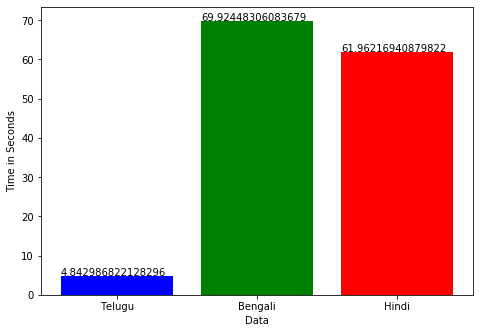

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['Telugu', 'Bengali', 'Hindi']
t_read = [t0,t1,t2]
ax.bar(lang[0], t_read[0], color = 'b')
ax.bar(lang[1], t_read[1], color = 'g')
ax.bar(lang[2], t_read[2], color = 'r')
for index, value in enumerate([0,1,2]):
    plt.text(value-0.4,t_read[value], str(t_read[value]))
plt.xlabel("Data")
plt.ylabel("Time in Seconds")    
plt.show()

### Text to Vector

In [21]:
#telugu
vectorizer_te = CountVectorizer()
X1 = vectorizer_te.fit_transform(filtered_sentence_te)

In [22]:
#bengali
vectorizer_be = CountVectorizer()
X2 = vectorizer_be.fit_transform(filtered_sentence_be)

In [23]:
#hindi
vectorizer_hi = CountVectorizer()
X3 = vectorizer_hi.fit_transform(filtered_sentence_hi)

### Label Encoding###

In [24]:
#telugu
le = LabelEncoder()
Y1 = le.fit_transform(sentiment_te[0:len(filtered_sentence_te)])
la1 = le.inverse_transform(Y1)
set(la1)

{'ne', 'neg', 'pos'}

In [25]:
#bengali
Y2 = le.fit_transform(sentiment_be[0:len(filtered_sentence_be)])
la2 = le.inverse_transform(Y2)
set(la2)

{'ne', 'neg', 'pos'}

In [26]:
#hindi
Y3 = le.fit_transform(sentiment_hi[0:len(filtered_sentence_hi)])
la3 = le.inverse_transform(Y3)
set(la3)

{'ne', 'neg', 'pos'}

### Splitting data - TELUGU

In [27]:
#Splitting the data into train data and test data
X_train_te, X_test_te, y_train_te, y_test_te = train_test_split(X1,Y1, test_size = 0.2, random_state = 42)

In [28]:
#Printing the size of the train data, train label, test data and test label
print("Shape train data = ",np.shape(X_train_te))
print("Shape of train label = ",np.shape(y_train_te))
print("Shape of test data = ",np.shape(X_test_te))
print("Shape of test label = ",np.shape(y_test_te))

Shape train data =  (13592, 3732)
Shape of train label =  (13592,)
Shape of test data =  (3398, 3732)
Shape of test label =  (3398,)


### Splitting data - BENGALI

In [29]:
#Splitting the data into train data and test data
X_train_be, X_test_be, y_train_be, y_test_be = train_test_split(X2,Y2, test_size = 0.2, random_state = 42)

In [30]:
print("Shape train data = ",np.shape(X_train_be))
print("Shape of train label = ",np.shape(y_train_be))
print("Shape of test data = ",np.shape(X_test_be))
print("Shape of test label = ",np.shape(y_test_be))

Shape train data =  (47622, 10753)
Shape of train label =  (47622,)
Shape of test data =  (11906, 10753)
Shape of test label =  (11906,)


### Splitting data - HINDI

In [31]:
#Splitting the data into train data and test data
X_train_hi, X_test_hi, y_train_hi, y_test_hi = train_test_split(X3,Y3, test_size = 0.2, random_state = 42)

In [32]:
print("Shape train data = ",np.shape(X_train_hi))
print("Shape of train label = ",np.shape(y_train_hi))
print("Shape of test data = ",np.shape(X_test_hi))
print("Shape of test label = ",np.shape(y_test_hi))

Shape train data =  (161932, 22833)
Shape of train label =  (161932,)
Shape of test data =  (40483, 22833)
Shape of test label =  (40483,)


### Classification Algorithm

#### KNN - Telugu

In [33]:
start = time.time()
clf_knn_te = KNeighborsClassifier()
clf_knn_te.fit(X_train_te,y_train_te)
end = time.time()
kt_0 = end-start
print("Time taken to train the model :",kt_0,"s")

Time taken to train the model : 0.007975339889526367 s


In [34]:
start = time.time()
y_pred_knn_te = clf_knn_te.predict(X_test_te)
end = time.time()
kt_1 = end-start
print("Time taken to test the model :",kt_1,"s")

Time taken to test the model : 4.465533256530762 s


#### KNN Report - Telugu

In [35]:
#Computation of the accuracy score
acc_knn_te = accuracy_score(y_test_te, y_pred_knn_te)
print('Accuracy = ','%.2f'%(acc_knn_te*100))

Accuracy =  78.99


In [36]:
from sklearn.metrics import classification_report
rep_knn_te = classification_report(y_test_te, y_pred_knn_te, output_dict=True)
rep1_knn_te = classification_report(y_test_te, y_pred_knn_te)

macro_precision_knn_te =  rep_knn_te['macro avg']['precision'] 
macro_recall_knn_te = rep_knn_te['macro avg']['recall']    
macro_f1_knn_te = rep_knn_te['macro avg']['f1-score']
accuracy_knn_te = rep_knn_te['accuracy']

print(rep1_knn_te)

              precision    recall  f1-score   support

           0       0.29      0.10      0.15       481
           1       0.25      0.09      0.13       163
           2       0.83      0.95      0.88      2754

    accuracy                           0.79      3398
   macro avg       0.46      0.38      0.39      3398
weighted avg       0.72      0.79      0.74      3398



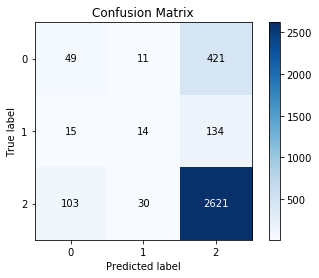

In [37]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_te, y_pred_knn_te)

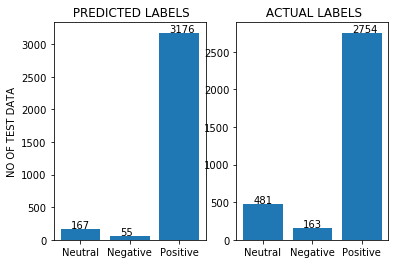

In [38]:
plt.subplot(1,2,1)
x = np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_knn_te[y_pred_knn_te==0]),len(y_pred_knn_te[y_pred_knn_te==1]),len(y_pred_knn_te[y_pred_knn_te==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_knn_te[y_pred_knn_te==value])+10 , str(len(y_pred_knn_te[y_pred_knn_te==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_te[y_test_te==0]),len(y_test_te[y_test_te==1]),len(y_test_te[y_test_te==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_te[y_test_te==value])+10 , str(len(y_test_te[y_test_te==value])))

#### KNN - Bengali

In [39]:
start = time.time()
clf_knn_be = KNeighborsClassifier(n_neighbors = 15)
clf_knn_be.fit(X_train_be,y_train_be)
end = time.time()
kb_0 = end-start
print("Time taken to train the model :",kb_0,"s")

Time taken to train the model : 0.0159456729888916 s


In [40]:
start = time.time()
y_pred_knn_be = clf_knn_be.predict(X_test_be)
end = time.time()
kb_1 = end-start
print("Time taken to test the model :",kb_1,"s")

Time taken to test the model : 34.44857978820801 s


#### KNN Report - Bengali

In [41]:
#Computation of the accuracy score
acc_knn_be = accuracy_score(y_test_be, y_pred_knn_be)
print('Accuracy = ','%.2f'%(acc_knn_be*100))

Accuracy =  60.73


In [42]:
from sklearn.metrics import classification_report
rep_knn_be = classification_report(y_test_be, y_pred_knn_be, output_dict=True)
rep1_knn_be = classification_report(y_test_be, y_pred_knn_be)

macro_precision_knn_be =  rep_knn_be['macro avg']['precision'] 
macro_recall_knn_be = rep_knn_be['macro avg']['recall']    
macro_f1_knn_be = rep_knn_be['macro avg']['f1-score']
accuracy_knn_be = rep_knn_be['accuracy']

print(rep1_knn_be)

              precision    recall  f1-score   support

           0       0.32      0.13      0.19      3219
           1       0.38      0.01      0.01      1097
           2       0.64      0.90      0.75      7590

    accuracy                           0.61     11906
   macro avg       0.45      0.34      0.32     11906
weighted avg       0.53      0.61      0.53     11906



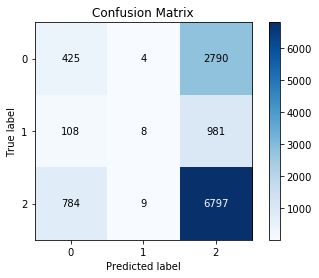

In [43]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_be, y_pred_knn_be)

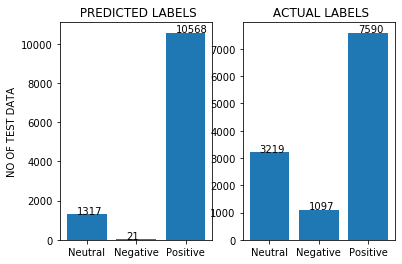

In [44]:
plt.subplot(1,2,1)
x = np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_knn_be[y_pred_knn_be==0]),len(y_pred_knn_be[y_pred_knn_be==1]),len(y_pred_knn_be[y_pred_knn_be==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_knn_be[y_pred_knn_be==value])+10 , str(len(y_pred_knn_be[y_pred_knn_be==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_be[y_test_be==0]),len(y_test_be[y_test_be==1]),len(y_test_be[y_test_be==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_be[y_test_be==value])+10 , str(len(y_test_be[y_test_be==value])))

#### KNN - Hindi

In [45]:
start = time.time()
clf_knn_hi = KNeighborsClassifier(n_neighbors = 15)
clf_knn_hi.fit(X_train_hi,y_train_hi)
end = time.time()
kh_0 = end-start
print("Time taken to train the model :",kh_0,"s")

Time taken to train the model : 0.07184815406799316 s


In [46]:
start = time.time()
y_pred_knn_hi = clf_knn_hi.predict(X_test_hi)
end = time.time()
kh_1 = end-start
print("Time taken to test the model :",kh_1,"s")

Time taken to test the model : 265.9274115562439 s


#### KNN Report - Hindi

In [47]:
#Computation of the accuracy score
acc_knn_hi = accuracy_score(y_test_hi, y_pred_knn_hi)
print('Accuracy = ','%.2f'%(acc_knn_hi*100))

Accuracy =  65.02


In [48]:
from sklearn.metrics import classification_report
rep_knn_hi = classification_report(y_test_hi, y_pred_knn_hi, output_dict=True)
rep1_knn_hi = classification_report(y_test_hi, y_pred_knn_hi)

macro_precision_knn_hi =  rep_knn_hi['macro avg']['precision'] 
macro_recall_knn_hi = rep_knn_hi['macro avg']['recall']    
macro_f1_knn_hi = rep_knn_hi['macro avg']['f1-score']
accuracy_knn_hi = rep_knn_hi['accuracy']

print(rep1_knn_hi)

              precision    recall  f1-score   support

           0       0.37      0.13      0.20      9135
           1       0.46      0.02      0.03      4473
           2       0.68      0.93      0.78     26875

    accuracy                           0.65     40483
   macro avg       0.50      0.36      0.34     40483
weighted avg       0.58      0.65      0.57     40483



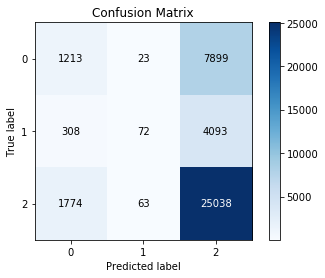

In [49]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_hi, y_pred_knn_hi)

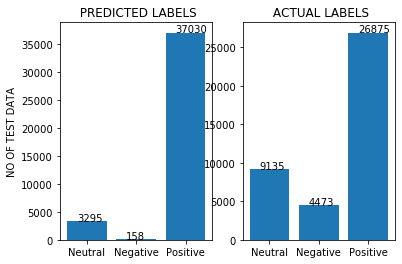

In [50]:
plt.subplot(1,2,1)
x = np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_knn_hi[y_pred_knn_hi==0]),len(y_pred_knn_hi[y_pred_knn_hi==1]),len(y_pred_knn_hi[y_pred_knn_hi==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_knn_hi[y_pred_knn_hi==value])+10 , str(len(y_pred_knn_hi[y_pred_knn_hi==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_hi[y_test_hi==0]),len(y_test_hi[y_test_hi==1]),len(y_test_hi[y_test_hi==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_hi[y_test_hi==value])+10 , str(len(y_test_hi[y_test_hi==value])))

#### Decision Tree Classifier - Telugu

In [51]:
start = time.time()
clf_dt_te = DecisionTreeClassifier()
clf_dt_te = clf_dt_te.fit(X_train_te, y_train_te)
end = time.time()
dt_0 = end-start
print("Time taken to train the model :",dt_0,"s")

Time taken to train the model : 1.544065237045288 s


In [52]:
start = time.time()
y_pred_dt_te = clf_dt_te.predict(X_test_te)
end = time.time()
dt_1 = end-start
print("Time taken to test the model :",dt_1,"s")

Time taken to test the model : 0.01242971420288086 s


#### Decision Tree Classifier Report - Telugu

In [53]:
#Computation of the accuracy score
acc_dt_te = accuracy_score(y_test_te, y_pred_dt_te)
print('Accuracy = ','%.2f'%(acc_dt_te*100))

Accuracy =  82.22


In [54]:
from sklearn.metrics import classification_report
rep_dt_te = classification_report(y_test_te, y_pred_dt_te, output_dict=True)
rep1_dt_te = classification_report(y_test_te, y_pred_dt_te)

macro_precision_dt_te =  rep_dt_te['macro avg']['precision'] 
macro_recall_dt_te = rep_dt_te['macro avg']['recall']    
macro_f1_dt_te = rep_dt_te['macro avg']['f1-score']
accuracy_dt_te = rep_dt_te['accuracy']

print(rep1_dt_te)

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       481
           1       0.49      0.50      0.50       163
           2       0.89      0.90      0.89      2754

    accuracy                           0.82      3398
   macro avg       0.63      0.63      0.63      3398
weighted avg       0.82      0.82      0.82      3398



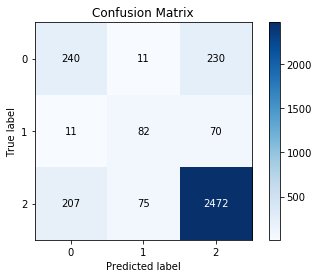

In [55]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_te, y_pred_dt_te)

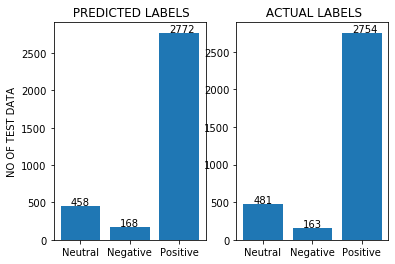

In [56]:
plt.subplot(1,2,1)
x=np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_dt_te[y_pred_dt_te==0]),len(y_pred_dt_te[y_pred_dt_te==1]),len(y_pred_dt_te[y_pred_dt_te==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_dt_te[y_pred_dt_te==value])+10 , str(len(y_pred_dt_te[y_pred_dt_te==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_te[y_test_te==0]),len(y_test_te[y_test_te==1]),len(y_test_te[y_test_te==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_te[y_test_te==value])+10 , str(len(y_test_te[y_test_te==value])))

#### Decision Tree Classifier - Bengali

In [57]:
start = time.time()
clf_dt_be = DecisionTreeClassifier()
clf_dt_be = clf_dt_be.fit(X_train_be, y_train_be)
end = time.time()
db_0 = end-start
print("Time taken to train the model :",db_0,"s")

Time taken to train the model : 18.38910984992981 s


In [58]:
start = time.time()
y_pred_dt_be = clf_dt_be.predict(X_test_be)
end = time.time()
db_1 = end-start
print("Time taken to test the model :",db_1,"s")

Time taken to test the model : 0.022971391677856445 s


#### Decision Tree Classifier Report - Bengali

In [59]:
#Computation of the accuracy score
acc_dt_be = accuracy_score(y_test_be, y_pred_dt_be)
print('Accuracy = ','%.2f'%(acc_dt_be*100))

Accuracy =  54.25


In [60]:
from sklearn.metrics import classification_report
rep_dt_be = classification_report(y_test_be, y_pred_dt_be, output_dict=True)
rep1_dt_be = classification_report(y_test_be, y_pred_dt_be)

macro_precision_dt_be =  rep_dt_be['macro avg']['precision'] 
macro_recall_dt_be = rep_dt_be['macro avg']['recall']    
macro_f1_dt_be = rep_dt_be['macro avg']['f1-score']
accuracy_dt_be = rep_dt_be['accuracy']

print(rep1_dt_be)

              precision    recall  f1-score   support

           0       0.35      0.34      0.35      3219
           1       0.12      0.09      0.11      1097
           2       0.66      0.69      0.68      7590

    accuracy                           0.54     11906
   macro avg       0.38      0.38      0.38     11906
weighted avg       0.53      0.54      0.54     11906



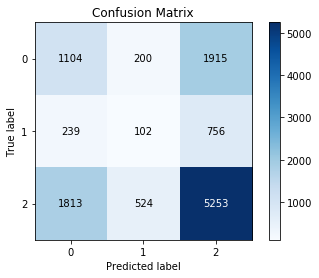

In [61]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_be, y_pred_dt_be)

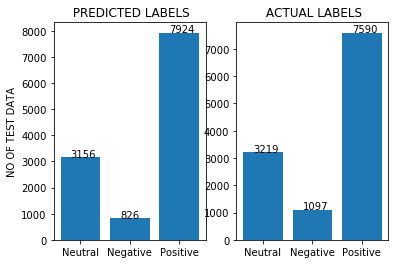

In [62]:
plt.subplot(1,2,1)
x=np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_dt_be[y_pred_dt_be==0]),len(y_pred_dt_be[y_pred_dt_be==1]),len(y_pred_dt_be[y_pred_dt_be==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_dt_be[y_pred_dt_be==value])+10 , str(len(y_pred_dt_be[y_pred_dt_be==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_be[y_test_be==0]),len(y_test_be[y_test_be==1]),len(y_test_be[y_test_be==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_be[y_test_be==value])+10 , str(len(y_test_be[y_test_be==value])))

#### Decision Tree Classifier - Hindi

In [63]:
start = time.time()
clf_dt_hi = DecisionTreeClassifier()
clf_dt_hi = clf_dt_hi.fit(X_train_hi, y_train_hi)
end = time.time()
dh_0 = end-start
print("Time taken to train the model :",dh_0,"s")

Time taken to train the model : 427.3051369190216 s


In [64]:
start = time.time()
y_pred_dt_hi = clf_dt_hi.predict(X_test_hi)
end = time.time()
dh_1 = end-start
print("Time taken to test the model :",dh_1,"s")

Time taken to test the model : 0.21741747856140137 s


#### Decision Tree Classifier Report - Hindi

In [65]:
#Computation of the accuracy score
acc_dt_hi = accuracy_score(y_test_hi, y_pred_dt_hi)
print('Accuracy = ','%.2f'%(acc_dt_hi*100))

Accuracy =  62.42


In [66]:
from sklearn.metrics import classification_report
rep_dt_hi = classification_report(y_test_hi, y_pred_dt_hi, output_dict=True)
rep1_dt_hi = classification_report(y_test_hi, y_pred_dt_hi)

macro_precision_dt_hi =  rep_dt_hi['macro avg']['precision'] 
macro_recall_dt_hi = rep_dt_hi['macro avg']['recall']    
macro_f1_dt_hi = rep_dt_hi['macro avg']['f1-score']
accuracy_dt_hi = rep_dt_hi['accuracy']

print(rep1_dt_hi)

              precision    recall  f1-score   support

           0       0.42      0.38      0.40      9135
           1       0.28      0.23      0.25      4473
           2       0.73      0.77      0.75     26875

    accuracy                           0.62     40483
   macro avg       0.48      0.46      0.47     40483
weighted avg       0.61      0.62      0.62     40483



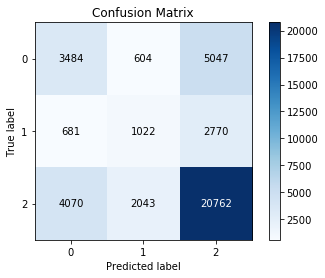

In [67]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_hi, y_pred_dt_hi)

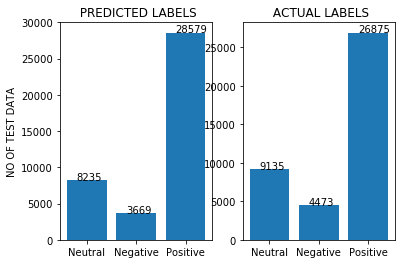

In [68]:
plt.subplot(1,2,1)
x=np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_dt_hi[y_pred_dt_hi==0]),len(y_pred_dt_hi[y_pred_dt_hi==1]),len(y_pred_dt_hi[y_pred_dt_hi==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_dt_hi[y_pred_dt_hi==value])+10 , str(len(y_pred_dt_hi[y_pred_dt_hi==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_hi[y_test_hi==0]),len(y_test_hi[y_test_hi==1]),len(y_test_hi[y_test_hi==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_hi[y_test_hi==value])+10 , str(len(y_test_hi[y_test_hi==value])))

#### Random forest Classifier - Telugu

In [69]:
start = time.time()
clf_rf_te = RandomForestClassifier(max_depth=200, random_state=0)
clf_rf_te.fit(X_train_te, y_train_te)
end = time.time()
rt_0 = end-start
print("Time taken to train the model :",rt_0,"s")

Time taken to train the model : 28.234376430511475 s


In [70]:
#Predict the class label for the test data using the trained model
start = time.time()
y_pred_rf_te = clf_rf_te.predict(X_test_te)
end = time.time()
rt_1 = end-start
print("Time taken to test the model :",rt_1,"s")

Time taken to test the model : 0.5255522727966309 s


#### Random forest Classifier Report - Telugu

In [71]:
#Computation of the accuracy score
acc_rf_te = accuracy_score(y_test_te, y_pred_rf_te)
print('Accuracy = ','%.2f'%(acc_rf_te*100))

Accuracy =  83.14


In [72]:
from sklearn.metrics import classification_report
rep_rf_te = classification_report(y_test_te, y_pred_rf_te, output_dict=True)
rep1_rf_te = classification_report(y_test_te, y_pred_rf_te)

macro_precision_rf_te =  rep_rf_te['macro avg']['precision'] 
macro_recall_rf_te = rep_rf_te['macro avg']['recall']    
macro_f1_rf_te = rep_rf_te['macro avg']['f1-score']
accuracy_rf_te = rep_rf_te['accuracy']

print(rep1_rf_te)

              precision    recall  f1-score   support

           0       0.84      0.13      0.23       481
           1       0.95      0.13      0.23       163
           2       0.83      1.00      0.91      2754

    accuracy                           0.83      3398
   macro avg       0.87      0.42      0.45      3398
weighted avg       0.84      0.83      0.78      3398



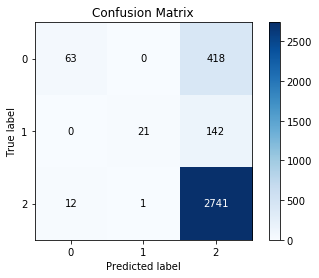

In [73]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_te, y_pred_rf_te)

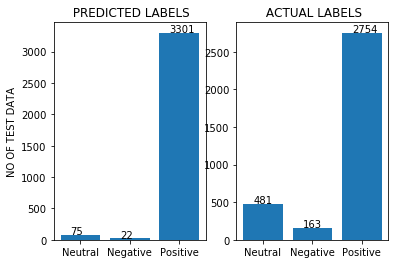

In [74]:
plt.subplot(1,2,1)
x=np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_rf_te[y_pred_rf_te==0]),len(y_pred_rf_te[y_pred_rf_te==1]),len(y_pred_rf_te[y_pred_rf_te==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_rf_te[y_pred_rf_te==value])+10 , str(len(y_pred_rf_te[y_pred_rf_te==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_te[y_test_te==0]),len(y_test_te[y_test_te==1]),len(y_test_te[y_test_te==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_te[y_test_te==value])+10 , str(len(y_test_te[y_test_te==value])))

#### Random forest Classifier - Bengali

In [75]:
start = time.time()
clf_rf_be = RandomForestClassifier(max_depth=200, random_state=0)
clf_rf_be.fit(X_train_be, y_train_be)
end = time.time()
rb_0 = end-start
print("Time taken to train the model :",rb_0,"s")

Time taken to train the model : 261.762323141098 s


In [76]:
#Predict the class label for the test data using the trained model
start = time.time()
y_pred_rf_be = clf_rf_be.predict(X_test_be)
end = time.time()
rb_1 = end-start
print("Time taken to test the model :",rb_1,"s")

Time taken to test the model : 1.9710659980773926 s


#### Random forest Classifier Report - Bengali

In [77]:
#Computation of the accuracy score
acc_rf_be = accuracy_score(y_test_be, y_pred_rf_be)
print('Accuracy = ','%.2f'%(acc_rf_be*100))

Accuracy =  65.88


In [78]:
from sklearn.metrics import classification_report
rep_rf_be = classification_report(y_test_be, y_pred_rf_be, output_dict=True)
rep1_rf_be = classification_report(y_test_be, y_pred_rf_be)

macro_precision_rf_be =  rep_rf_be['macro avg']['precision'] 
macro_recall_rf_be = rep_rf_be['macro avg']['recall']    
macro_f1_rf_be = rep_rf_be['macro avg']['f1-score']
accuracy_rf_be = rep_rf_be['accuracy']

print(rep1_rf_be)

              precision    recall  f1-score   support

           0       0.76      0.11      0.19      3219
           1       0.80      0.01      0.02      1097
           2       0.65      0.99      0.79      7590

    accuracy                           0.66     11906
   macro avg       0.74      0.37      0.33     11906
weighted avg       0.70      0.66      0.55     11906



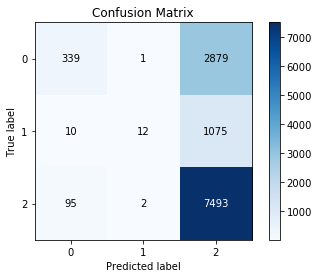

In [79]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_be, y_pred_rf_be)

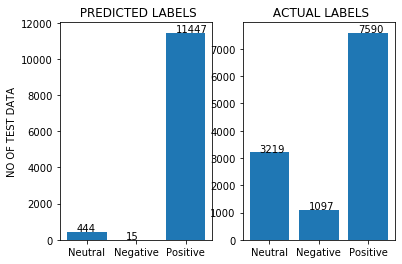

In [80]:
plt.subplot(1,2,1)
x=np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_rf_be[y_pred_rf_be==0]),len(y_pred_rf_be[y_pred_rf_be==1]),len(y_pred_rf_be[y_pred_rf_be==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_rf_be[y_pred_rf_be==value])+10 , str(len(y_pred_rf_be[y_pred_rf_be==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_be[y_test_be==0]),len(y_test_be[y_test_be==1]),len(y_test_be[y_test_be==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_be[y_test_be==value])+10 , str(len(y_test_be[y_test_be==value])))

#### Random forest Classifier - Hindi

In [ ]:
start = time.time()
clf_rf_hi = RandomForestClassifier()
clf_rf_hi.fit(X_train_hi, y_train_hi)
end = time.time()
rh_0 = end-start
print("Time taken to train the model :",rh_0,"s")

In [ ]:
#Predict the class label for the test data using the trained model
start = time.time()
y_pred_rf_hi = clf_rf_hi.predict(X_test_hi)
end = time.time()
rh_1 = end-start
print("Time taken to test the model :",rh_1,"s")

#### Random forest Classifier Report - Hindi

In [ ]:
#Computation of the accuracy score
acc_rf_hi = accuracy_score(y_test_hi, y_pred_rf_hi)
print('Accuracy = ','%.2f'%(acc_rf_hi*100))

In [ ]:
from sklearn.metrics import classification_report
rep_rf_hi = classification_report(y_test_hi, y_pred_rf_hi, output_dict=True)
rep1_rf_hi = classification_report(y_test_hi, y_pred_rf_hi)

macro_precision_rf_hi =  rep_rf_hi['macro avg']['precision'] 
macro_recall_rf_hi = rep_rf_hi['macro avg']['recall']    
macro_f1_rf_hi = rep_rf_hi['macro avg']['f1-score']
accuracy_rf_hi = rep_rf_hi['accuracy']

print(rep1_rf_hi)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_hi, y_pred_rf_hi)

In [ ]:
plt.subplot(1,2,1)
x=np.arange(3)
plt.bar([0,1,2], height=[len(y_pred_rf_hi[y_pred_rf_hi==0]),len(y_pred_rf_hi[y_pred_rf_hi==1]),len(y_pred_rf_hi[y_pred_rf_hi==2])],)
plt.xticks([0,1,2], ['Neutral','Negative','Positive'])
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_pred_rf_hi[y_pred_rf_hi==value])+10 , str(len(y_pred_rf_hi[y_pred_rf_hi==value])))
    
plt.subplot(1,2,2)
plt.bar(x, height=[len(y_test_hi[y_test_hi==0]),len(y_test_hi[y_test_hi==1]),len(y_test_hi[y_test_hi==2])],)
plt.xticks(x, ['Neutral','Negative','Positive'])
plt.title(" ACTUAL LABELS")
for index, value in enumerate([0,1,2]):
    plt.text(value-0.2,len(y_test_hi[y_test_hi==value])+10 , str(len(y_test_hi[y_test_hi==value])))

### Result & Time Analysis - Telugu ###

In [ ]:
a=np.arange(3)
w = 0.15
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')
p1=ax.bar(a,[accuracy_knn_te,accuracy_dt_te,accuracy_rf_te],w,color='b')
p2=ax.bar(a-w,[macro_precision_knn_te,macro_precision_dt_te,macro_precision_rf_te],w,color='g')
p3=ax.bar(a-2*w,[macro_recall_knn_te,macro_recall_dt_te,macro_recall_rf_te],w,color='y')
p4=ax.bar(a+w,[macro_f1_knn_te,macro_f1_dt_te,macro_f1_rf_te],w,color='r')
ax.set_xticks(a)
ax.set_xticklabels(('KNN','Decision tree','Random Forest Classifier'))
ax.set_title('Comparision Between Classifiers - Telugu')
ax.legend((p1[0],p2[0],p3[0],p4[0]),('Accuracy','Precision','Recall','F1-Score'))
plt.xlabel('Classifiers - Telugu Data')
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
#class - time ana
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['KNN', 'Decision Tree', 'Random Forest Classifier']
t_read = [kt_0,dt_0,rt_0]
ax.bar(lang[0], t_read[0], color = 'b')
ax.bar(lang[1], t_read[1], color = 'g')
ax.bar(lang[2], t_read[2], color = 'r')
for index, value in enumerate([0,1,2]):
    plt.text(value-0.4,t_read[value], str(t_read[value]))
plt.xlabel("Classifers - Telugu")
plt.ylabel("time in seconds")
plt.title("Runtime for model training")
plt.show()

In [ ]:
#test - time ana
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['KNN', 'Decision Tree', 'Random Forest Classifier']
t_read = [kt_1,dt_1,rt_1]
ax.bar(lang[0], t_read[0], color = 'b')
ax.bar(lang[1], t_read[1], color = 'g')
ax.bar(lang[2], t_read[2], color = 'r')
for index, value in enumerate([0,1,2]):
    plt.text(value-0.4,t_read[value], str(t_read[value]))
plt.xlabel("Classifers - Telugu")
plt.ylabel("time in seconds")
plt.title("Runtime for model testing")
plt.show()

### Result & Time Analysis - Bengali ###

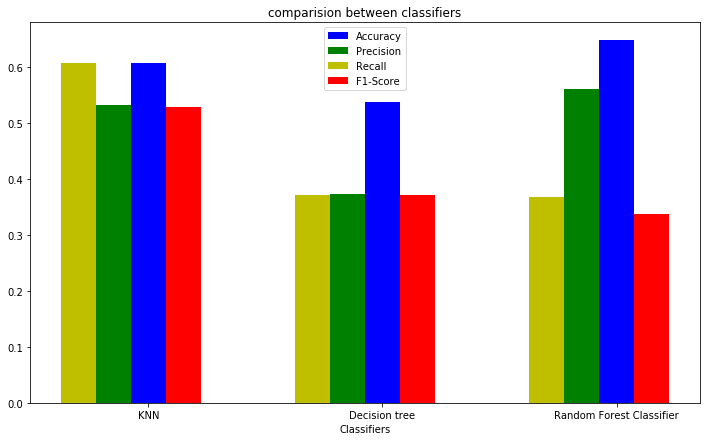

<Figure size 720x720 with 0 Axes>

In [106]:
a=np.arange(3)
w = 0.15
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')
p1=ax.bar(a,[accuracy_knn_be,accuracy_dt_be,accuracy_rf_be],w,color='b')
p2=ax.bar(a-w,[macro_precision_knn_be,macro_precision_dt_be,macro_precision_rf_be],w,color='g')
p3=ax.bar(a-2*w,[macro_recall_knn_be,macro_recall_dt_be,macro_recall_rf_be],w,color='y')
p4=ax.bar(a+w,[macro_f1_knn_be,macro_f1_dt_be,macro_f1_rf_be],w,color='r')
ax.set_xticks(a)
ax.set_xticklabels(('KNN','Decision tree','Random Forest Classifier'))
ax.set_title('Comparision Between Classifiers - Bengali')
ax.legend((p1[0],p2[0],p3[0],p4[0]),('Accuracy','Precision','Recall','F1-Score'))
plt.xlabel('Classifiers - Bengali Data')
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
#class - time ana
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['KNN', 'Decision Tree', 'Random Forest Classifier']
t_read = [kb_0,db_0,rb_0]
ax.bar(lang[0], t_read[0], color = 'b')
ax.bar(lang[1], t_read[1], color = 'g')
ax.bar(lang[2], t_read[2], color = 'r')
for index, value in enumerate([0,1,2]):
    plt.text(value-0.4,t_read[value], str(t_read[value]))
plt.xlabel("Classifers - Bengali")
plt.ylabel("time in seconds")
plt.title("Runtime for model training")
plt.show()

In [ ]:
#test - time ana
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['KNN', 'Decision Tree', 'Random Forest Classifier']
t_read = [kb_1,db_1,rb_1]
ax.bar(lang[0], t_read[0], color = 'b')
ax.bar(lang[1], t_read[1], color = 'g')
ax.bar(lang[2], t_read[2], color = 'r')
for index, value in enumerate([0,1,2]):
    plt.text(value-0.4,t_read[value], str(t_read[value]))
plt.xlabel("Classifers - Bengali")
plt.ylabel("time in seconds")
plt.title("Runtime for model testing")
plt.show()

### Result & Time Analysis - Hindi ###

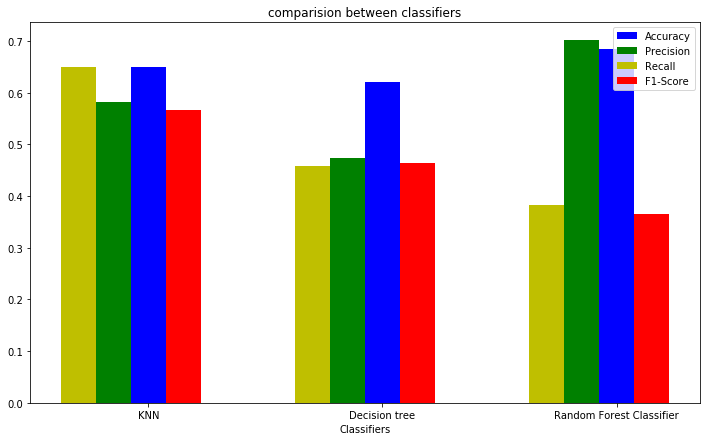

<Figure size 720x720 with 0 Axes>

In [104]:
a=np.arange(3)
w = 0.15
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')
p1=ax.bar(a,[accuracy_knn_hi,accuracy_dt_hi,accuracy_rf_hi],w,color='b')
p2=ax.bar(a-w,[macro_precision_knn_hi,macro_precision_dt_hi,macro_precision_rf_hi],w,color='g')
p3=ax.bar(a-2*w,[macro_recall_knn_hi,macro_recall_dt_hi,macro_recall_rf_hi],w,color='y')
p4=ax.bar(a+w,[macro_f1_knn_hi,macro_f1_dt_hi,macro_f1_rf_hi],w,color='r')
ax.set_xticks(a)
ax.set_xticklabels(('KNN','Decision tree','Random Forest Classifier'))
ax.set_title('Comparision Between Classifiers - Hindi')
ax.legend((p1[0],p2[0],p3[0],p4[0]),('Accuracy','Precision','Recall','F1-Score'))
plt.xlabel('Classifiers - Hindi Data')
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
#class - time ana
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['KNN', 'Decision Tree', 'Random Forest Classifier']
t_read = [kh_0,dh_0,rh_0]
ax.bar(lang[0], t_read[0], color = 'b')
ax.bar(lang[1], t_read[1], color = 'g')
ax.bar(lang[2], t_read[2], color = 'r')
for index, value in enumerate([0,1,2]):
    plt.text(value-0.4,t_read[value], str(t_read[value]))
plt.xlabel("Classifers - Hindi")
plt.ylabel("time in seconds")
plt.title("Runtime for model training")
plt.show()

In [ ]:
#test - time ana
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['KNN', 'Decision Tree', 'Random Forest Classifier']
t_read = [kh_1,dh_1,rh_1]
ax.bar(lang[0], t_read[0], color = 'b')
ax.bar(lang[1], t_read[1], color = 'g')
ax.bar(lang[2], t_read[2], color = 'r')
for index, value in enumerate([0,1,2]):
    plt.text(value-0.4,t_read[value], str(t_read[value]))
plt.xlabel("Classifers - Hindi")
plt.ylabel("time in seconds")
plt.title("Runtime for model testing")
plt.show()

In [119]:
vectorizer=[vectorizer_te,0,0,vectorizer_be,0,0,vectorizer_hi,0,0]
Classifiers=[clf_knn_te,clf_dt_te,clf_rf_te,clf_knn_be,clf_dt_be,clf_rf_be,clf_knn_hi,clf_dt_hi,clf_rf_hi]
def predict():
    #ans = remove_punct(str(textArea.get("1.0","end")))
    for i in range(0,9,3):
        if(i==0):
            ans = remove_punct_te(str(textArea.get("1.0","end")))
        if(i==3):
            ans = remove_punct_be(str(textArea.get("1.0","end")))
        if(i==6):
            ans = remove_punct_hi(str(textArea.get("1.0","end")))
        if(int(var.get())==i):
            X1 = vectorizer[i].transform([ans])
            
            for j in range(1,4):
                if(int(var1.get())==j):
                    pred=Classifiers[i+j-1].predict(X1)
                    
                    if(pred==0):
                        Label(gui, text ="The predicted Tweet is Neutral").place(x=120,y=320)
                        photo0 = PhotoImage(file = r"Sentiment_analysis_classPNGS/neu.png") 
                        photoimage0 = photo0.subsample(3, 3) 
                        Button(gui, image = photoimage0).place(x=150,y=350)
                        Button.pack()
                    if(pred==1):
                        Label(gui, text ="The predicted Tweet is Negative" ).place(x=120,y=320)
                        photo1= PhotoImage(file = r"Sentiment_analysis_classPNGS/neg.png") 
                        photoimage1 = photo1.subsample(3, 3) 
                        Button(gui, image = photoimage1).place(x=120,y=350) 
                        Button.pack()
                    if(pred==2):
                        Label(gui, text ="The predicted Tweet is Positive" ).place(x=120,y=320)
                        photo2 = PhotoImage(file = r"Sentiment_analysis_classPNGS/pos.png") 
                        photoimage2 = photo2.subsample(3, 3) 
                        Button(gui, image = photoimage2).place(x=120,y=350) 
                        Button.pack()

In [121]:
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk)
import tkinter as tk
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import *
from matplotlib.figure import Figure 


gui = Tk()
gui.title("Sentiment Analysis - Report")
gui.geometry('480x550')

Accuracy=[accuracy_knn_te,accuracy_dt_te,accuracy_rf_te,accuracy_knn_be,accuracy_dt_be,accuracy_rf_be,accuracy_knn_hi,accuracy_dt_hi,accuracy_rf_hi]
Precision=[macro_precision_knn_te ,macro_precision_dt_te ,macro_precision_rf_te ,macro_precision_knn_be ,macro_precision_dt_be ,macro_precision_rf_be ,macro_precision_knn_hi ,macro_precision_dt_hi ,macro_precision_rf_hi]
Recall=[macro_recall_knn_te ,macro_recall_dt_te ,macro_recall_rf_te ,macro_recall_knn_be ,macro_recall_dt_be ,macro_recall_rf_be ,macro_recall_knn_hi ,macro_recall_dt_hi ,macro_recall_rf_hi]
F1_score=[macro_f1_knn_te,macro_f1_dt_te,macro_f1_rf_te,macro_f1_knn_be,macro_f1_dt_be,macro_f1_rf_be,macro_f1_knn_hi,macro_f1_dt_hi,macro_f1_rf_hi]
def sel():
    for i in range(0,9,3):
        if(int(var.get())==i):
            for j in range(1,4):
                if(int(var1.get())==j):
                    Label(gui, text =str(Accuracy[i+j-1])). place(x=300,y=50)
                    Label(gui, text =str(Precision[i+j-1])). place(x=300,y=75)
                    Label(gui, text =str(Recall[i+j-1])). place(x=300,y=100)
                    Label(gui, text =str(F1_score[i+j-1])). place(x=300,y=125)
            

var = IntVar()
lbl = Label(gui,text = "Language ")
lbl.pack(anchor = W  )
lbl.place(x=0,y=25)

R1 = Radiobutton(gui, text="Telugu", variable=var, value=0,command=sel)
R1.pack( anchor = W )
R1.place(x=0,y=50)
R2 = Radiobutton(gui, text="Bengali", variable=var, value=3,command=sel)
R2.pack( anchor = W )
R2.place(x=0,y=70)
R3 = Radiobutton(gui, text="Hindi", variable=var, value=6,command=sel)
R3.pack( anchor = W)
R3.place(x=0,y=90)

lbl = Label(gui,text = "Algorithm") 
lbl.pack(anchor = W )
lbl.place(x=0,y=135)
var1 = IntVar()
R11 = Radiobutton(gui, text="KNN", variable=var1, value=1,command=sel)
R11.pack( anchor = W )
R11.place(x=0,y=160)
R12 = Radiobutton(gui, text="Decision Tree", variable=var1, value=2,command=sel)
R12.pack( anchor = W )
R12.place(x=0,y=180)
R13 = Radiobutton(gui, text="Random Forest", variable=var1, value=3,command=sel)
R13.pack( anchor = W)
R13.place(x=0,y=200)

Label(gui, text = "Evaluation metrics  :").place(x=200,y=25)
Label(gui, text = "Accuracy :").place(x=230,y=50)
Label(gui, text = "Precision").place(x=230,y=75)
Label(gui, text = "Recall   : ").place(x=230,y=100)
Label(gui, text = "F1_Score : ").place(x=230,y=125)

Label(gui, text = "Enter Tweets: ").place(x=25,y=250)

textArea = Text(gui, height = 2, width = 25, font = "cambria 13")
textArea.place(x=100,y=250)
run_button = Button(gui,  command = predict, text = "predict")
run_button.pack() 
run_button.place(x=340,y=255)
#Label(gui, text = "F1_Score : ").place(x=500,y=125)
#Accuracy = Entry(gui,bd=5).place(x=300,y=50)
#Precision = Entry(gui).place(x=300,y=75)
#Recall = Entry(gui).place(x=300,y=100)
#F1_Score = Entry(gui).place(x=300,y=125)

# button that displays the plot 
###plot_button = Button(gui,  
                     #command = plot, 
                     #height = 2,  
                     #width = 10, 
                     
                     #text = "Plot")
  
# place the button  
# in main window 

#plot_button.pack() ""
#plot_button.place(x=250,y=250)


label = Label(gui)
#label.pack()
gui.mainloop()

In [ ]:
#సమయం లేదు మిత్రమా... థియేటరా? యూట్యూబా? 40 Mints TO GO NBK #GPSTrailerStorm #GPSKTrailerPhenom
#ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరోకి ఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు.. #ప్రభాస్
#అందరు అంటారు నిజం ఎప్పుడు ఒడిపోదు అని కానీ అబద్దం కూడా ఎప్పుడు ఒడిపోదు గా